## Iris鸢尾花分类
KNN中，用K折交叉验证寻找最佳的K

In [1]:
import pandas as pd
import numpy as np

#KNN
from sklearn.neighbors import KNeighborsClassifier

# 模型性能的评价,本案例为分类问题，用正确率作为模型性能评价指标
from sklearn.metrics import accuracy_score 

#作图
import matplotlib.pyplot as plt 
%matplotlib inline

#显示中文
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [5]:
#读取数据
# csv文件没有列名，增加列名
feat_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

dpath = "./data/"
df = pd.read_csv(dpath + "iris.csv", names = feat_names)

#通过观察前5行，了解数据每列（特征）的概况
df.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# 数据总体信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
Class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
#标签字符串映射为整数（在此并不一定需要）
target_map = {'Iris-setosa':0, 
              'Iris-versicolor':1,
              'Iris-virginica':2 }  #2

# Use the pandas apply method to numerically encode our attrition target variable
df['Class'] = df['Class'].apply(lambda x: target_map[x])

In [8]:
# 从原始数据中分离输入特征x和输出y
y = df['Class']
X = df.drop('Class', axis = 1)

In [9]:
# 特征缩放:数据标准化
from sklearn.preprocessing import StandardScaler

#模型训练
scaler = StandardScaler()
scaler.fit(X)

#特征缩放
X = scaler.transform(X)
#X_test = scaler.transform(X_test)

In [10]:
#将数据分割训练数据与测试数据
from sklearn.model_selection import train_test_split

# 随机采样20%的数据构建验证集，其余作为训练样本
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.2)

In [13]:
X.shape

(150, 4)

In [11]:
X_train.shape

(120, 4)

In [12]:
X_test.shape

(30, 4)

### 采用独立的验证集

In [8]:
#设置超参数的搜索范围
Ks = range(1, 40)

#不同超参数对应的模型性能
accuracy = []
for j, K in enumerate(Ks):
    knn = KNeighborsClassifier(n_neighbors = K)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred ) ) 

In [9]:
### 最佳超参数
index = np.unravel_index(np.argmax(accuracy), len(Ks))
best_parameter = Ks[ index[0] ]

print(best_parameter)

9


In [10]:
accuracy[best_parameter]

0.9

Text(0,0.5,u'\u6b63\u786e\u7387')

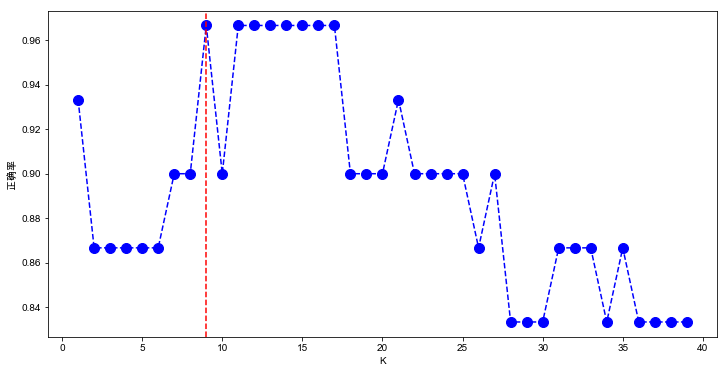

In [11]:
#不同超参数K对应的验证集上的性能
plt.figure(figsize=(12, 6))
plt.plot(Ks, accuracy, color='b', linestyle='dashed', marker='o',
         markerfacecolor='b', markersize=10)

#最佳超参数
plt.axvline(best_parameter, color='r', ls='--')

plt.xlabel(u'K')
plt.ylabel(u'正确率')

### 5折交叉验证

In [12]:
from sklearn.model_selection import GridSearchCV

#设置超参数搜索范围
tuned_parameters = dict(n_neighbors = Ks)

#生成学习器实例
knn = KNeighborsClassifier()

#生成GridSearchCV实例
grid= GridSearchCV(knn, tuned_parameters,cv=15, scoring='accuracy',n_jobs = 4)

#训练，交叉验证对超参数调优
grid.fit(X,y)

GridSearchCV(cv=15, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [13]:
best_parameter = grid.best_params_['n_neighbors']
best_parameter

14

Text(0,0.5,u'\u6b63\u786e\u7387')

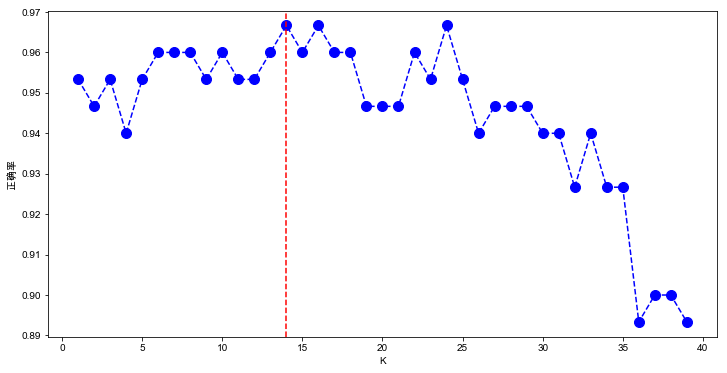

In [14]:
# plot CV误差曲线
accuracy = grid.cv_results_[ 'mean_test_score' ]

plt.figure(figsize=(12, 6))
plt.plot(Ks, accuracy, color='b', linestyle='dashed', marker='o',
         markerfacecolor='b', markersize=10)

#最佳超参数
plt.axvline(best_parameter, color='r', ls='--')

plt.xlabel(u'K')
plt.ylabel(u'正确率')

In [15]:
best_parameter

14

In [16]:
accuracy[best_parameter]

0.96

In [17]:
best_parameter

14

## 取前2维特征，在2D平面上可视化决策边界

In [18]:
#用所用的数据做训练
X_train = X
y_train = y

#取前2维特征
X_train_2d = X_train[:, :2] 

#训练分类器
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train_2d, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [19]:
#画出分类器的决策边界
def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None):
    if eps is None:
        eps = X.std() / 2.
    
    x1_min, x2_min = X.min(axis=0) - eps
    x1_max, x2_max = X.max(axis=0) + eps
   
    x1 = np.linspace(x1_min, x1_max, 500)
    x2 = np.linspace(x2_min, x2_max, 500)

    # 生成网格采样点
    X1, X2 = np.meshgrid(x1, x2)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]

    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, colors=['blue', 'red'])
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black")
    
    ax.set_xlim(x1_min, x1_max)
    ax.set_ylim(x2_min, x2_max)
    ax.set_xticks(())
    ax.set_yticks(())

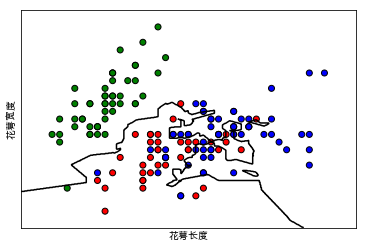

In [20]:
import matplotlib as mpl
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
#marks = ['o','^','v']
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c = y_train, cmap=cm_dark,marker='o', edgecolors='k')

plot_2d_separator(knn, X_train_2d) # plot the boundary

#plt.xlabel(df.columns[0])
#plt.ylabel(df.columns[1])
plt.xlabel(u'花萼长度')
plt.ylabel(u'花萼宽度')
plt.legend()
plt.show()